<H1> ANÁLISES DE DADOS

<H3>Fazendo as análises de dados da Bolsa de valores 



In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
from prophet import Prophet

c:\Users\ghoca\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3> Importando as tabelas

In [2]:
dados_principal = pd.read_excel("Imersão Python - Tabela de ações.xlsx", sheet_name="Principal")

In [3]:
dados_acoes = pd.read_excel("Imersão Python - Tabela de ações.xlsx", sheet_name="Total_de_acoes")
dados_acoes

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07
...,...,...
84,VBBR3,1.114413e+09
85,WEGE3,1.481593e+09
86,YDUQ3,2.893479e+08
87,Quantidade Teórica Total,9.637210e+10


In [4]:
dados_ticker = pd.read_excel("Imersão Python - Tabela de ações.xlsx", sheet_name="Ticker")

In [5]:
dados_chatGPT = pd.read_excel("Imersão Python - Tabela de ações.xlsx", sheet_name="ChatGPT")

In [6]:
dados_principal = dados_principal[["Ativo", "Data", "Último (R$)", "Var. Dia (%)"]].copy()
dados_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [7]:
dados_principal = dados_principal.rename(columns={"Último (R$)":"Valor_final", "Var. Dia (%)": "Var_dia"}).copy()

<h3> Criando as colunas que serão necessárias

In [8]:
dados_principal["Var_pct"] = dados_principal["Var_dia"]/100
dados_principal

,Ativo,Data,Valor_final,Var_dia,Var_pct
0,USIM5,2024-01-26,9.50,5.20,0.0520
1,CMIN3,2024-01-26,6.82,2.40,0.0240
2,PETR3,2024-01-26,41.96,2.19,0.0219
3,SUZB3,2024-01-26,52.91,2.04,0.0204
4,CPFE3,2024-01-26,37.10,2.03,0.0203
...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246
78,RENT3,2024-01-26,56.24,-3.63,-0.0363
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436


In [9]:
dados_principal["Var_inicial"] = dados_principal["Valor_final"]/(dados_principal["Var_pct"]+1)
dados_principal


,Ativo,Data,Valor_final,Var_dia,Var_pct,Var_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954


In [10]:
#Unindo as duas tabelas, onde pega a tabele principal e junta com a segunda tabela, indicando as colunas que serão unidas em cada uma na ordem, e qual será a principal 
dados_principal = dados_principal.merge(dados_acoes, left_on="Ativo", right_on="Código", how="left")


In [11]:
#Retirando a coluna Código e renomeando a coluna Qtde teórica
dados_principal = dados_principal.drop(columns=["Código"])
dados_principal = dados_principal.rename(columns={"Qtde. Teórica":"Qtd_teorica"}).copy()

In [12]:
#Criando a coluna Variação
dados_principal["Variacao"] = (dados_principal["Valor_final"]-dados_principal["Var_inicial"])*dados_principal["Qtd_teorica"]

In [13]:
#Alterando o tipo de visualização dos dados
pd.options.display.float_format = "{:.2f}".format 

In [14]:
#Alterando o tipo da coluna Qtd_teorica
dados_principal["Qtd_teorica"] = dados_principal["Qtd_teorica"].astype(int)

In [15]:
#Fazendo o IF ELSE
dados_principal["Resultado"] = dados_principal["Variacao"].apply(lambda x: "Subiu" if x > 0 else ("Desceu" if x < 0 else "Estável") )

In [16]:
dados_principal = dados_principal.merge(dados_ticker, left_on="Ativo", right_on="Ticker", how="left")
dados_principal = dados_principal.drop(columns=["Ticker"])


In [17]:
dados_principal

,Ativo,Data,Valor_final,Var_dia,Var_pct,Var_inicial,Qtd_teorica,Variacao,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC


In [18]:
dados_principal = dados_principal.merge(dados_chatGPT, left_on="Nome", right_on="Nome da empresa", how="left")
dados_principal

,Ativo,Data,Valor_final,Var_dia,Var_pct,Var_inicial,Qtd_teorica,Variacao,Resultado,Nome,Nome da empresa,Segmento,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,CSN Mineração,Mineração,8
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Petrobras,Petróleo,69
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Petrobras,Petróleo,69
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Suzano,Papel e Celulose,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Carrefour Brasil,Varejo,37
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Casas Bahia,Varejo,95
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Localiza,Aluguel de Carros,49
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,CVC,Turismo,50


In [19]:
dados_principal["Cat_idade"] = dados_principal["Idade (anos)"].apply(lambda x: "Centenária" if x > 100 else ("Nova" if x < 50 else "Mediana") )

In [20]:
dados_principal = dados_principal.drop(columns=["Nome da empresa"])

<h3> Análises 

In [21]:
max_value = dados_principal['Variacao'].max()
min_value = dados_principal['Variacao'].min()
mean_value = dados_principal['Variacao'].mean()

In [22]:
resultado_geral= dados_principal.groupby('Resultado')['Variacao'].agg(['mean'])

In [23]:
fig = px.bar(resultado_geral, y='mean', x=resultado_geral.index, title='Variação Reais por Resultado')
fig.show()

In [24]:
resultado_segmentos = dados_principal.groupby(['Segmento', 'Resultado'])['Variacao'].sum().unstack()
print(resultado_segmentos)

Resultado                  Desceu  Estável          Subiu
Segmento                                                 
Aeronáutica         -233651943.50      NaN            NaN
Agronegócio           -9468663.68      NaN            NaN
Alimentos                     NaN     0.00   407833683.09
Aluguel de Carros  -1807432634.46      NaN            NaN
Automação           -118230410.44      NaN            NaN
Aviação             -102993202.62      NaN    65452205.55
Açúcar e Álcool      -79432785.74      NaN            NaN
Banco                         NaN      NaN  4636679965.25
Bebidas                       NaN     0.00            NaN
Bolsa de Valores   -1173785666.36      NaN            NaN
Construção           -84945431.64      NaN    37525872.38
Cosméticos          -193280001.21      NaN            NaN
Educação             -17653966.51      NaN    72295838.99
Energia            -1394552854.83      NaN  1209821623.57
Farmacêutica        -208257014.20      NaN            NaN
Holding       

In [25]:
subiu = resultado_segmentos["Subiu"]
segmento = resultado_segmentos.index

In [26]:
fig = px.pie(resultado_segmentos, 
             values=subiu, 
             names=segmento, 
             title='Segmentos - Valores "Subiu"',
             color_discrete_sequence=px.colors.qualitative.Set3,  # Escolhendo uma paleta de cores
             hover_name=resultado_segmentos.index,  # Adicionando rótulos informativos
             labels='label')  # Removendo as porcentagens

# Personalizando o layout do gráfico
fig.update_layout(
    margin=dict(t=50, b=50, l=50, r=50),  # Margens
    title_font=dict(size=20),  # Tamanho do título
    title_x=0.5,  # Posição horizontal do título
    title_y=0.95,  # Posição vertical do título
    showlegend=True  # Mostrar legenda
)

# Mostrando o gráfico
fig.show()

<h3> Análises avançadas

In [27]:
data = yf.download("PETR4.SA", start="2023-01-01", end="2023-12-31")
data.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

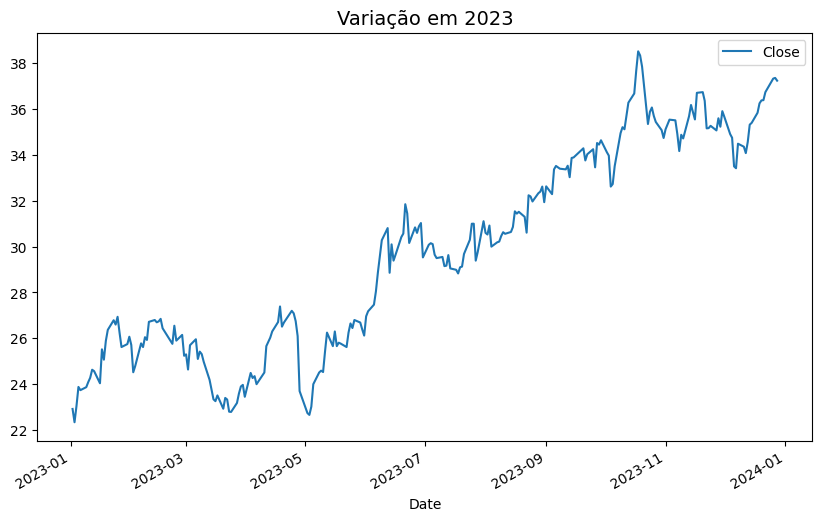

In [28]:
data["Close"].plot(figsize=(10,6))
plt.title("Variação em 2023", fontsize=14)
plt.legend(["Close"])

In [29]:
data = data.head(60).copy()
data["Date"] = data.index
data["Date"] = data["Date"].apply(mdates.date2num)

In [30]:
print (data)

            Open  High   Low  Close  Adj Close     Volume     Date
Date                                                              
2023-01-02 23.54 23.81 22.80  22.92      17.71   78424700 19359.00
2023-01-03 22.94 23.10 22.13  22.34      17.26   96750300 19360.00
2023-01-04 21.96 23.59 21.83  23.05      17.81  129504000 19361.00
2023-01-05 23.34 24.04 23.15  23.88      18.45   73886000 19362.00
2023-01-06 23.94 24.32 23.55  23.74      18.34   51851500 19363.00
2023-01-09 23.50 24.00 23.25  23.87      18.44   46385200 19366.00
2023-01-10 23.95 24.11 23.37  24.09      18.61   52741100 19367.00
2023-01-11 24.15 24.62 24.05  24.28      18.76   53536500 19368.00
2023-01-12 24.29 24.65 24.11  24.63      19.03   58130000 19369.00
2023-01-13 24.44 24.66 24.25  24.57      18.98   40002700 19370.00
2023-01-16 24.41 24.50 23.83  24.04      18.57   31973700 19373.00
2023-01-17 24.11 25.62 24.11  25.52      19.72   91797500 19374.00
2023-01-18 25.84 26.03 25.00  25.07      19.37   69692900 1937

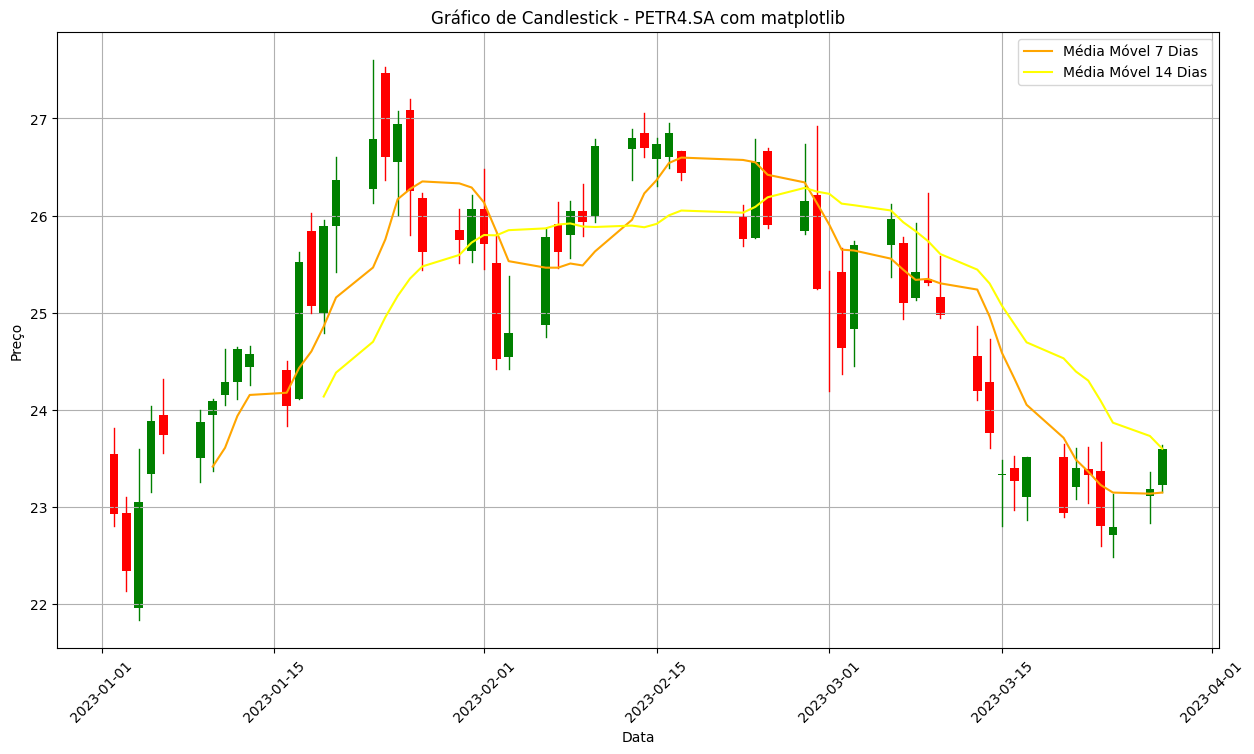

In [31]:
#Criando um tela para o desenho do gráfico
fig, ax = plt.subplots(figsize=(15, 8))

#Definindo a largura de cada "Candle"
width = 0.7

#Criando a função para a criação dos candles
    #Definindo as cores de acordo com a diferença entra a abertura e o fechamento
for i in range(len(data)):
    if data["Close"].iloc[i] > data["Open"].iloc[i]:
        color = "green"
    else:
        color = "red"

#Desenhando on intervalos de cada um dos candles (máximo e mínimo do dia)
    ax.plot([data['Date'].iloc[i], data['Date'].iloc[i]],
            [data['Low'].iloc[i], data['High'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((data['Date'].iloc[i] - width/2, min(data['Open'].iloc[i], data['Close'].iloc[i])), #Localização da caixa
                                width,
                                abs(data['Close'].iloc[i] - data['Open'].iloc[i]), #Tamanho da caixa
                                facecolor=color))

data['MA7'] = data['Close'].rolling(window=7).mean() #Rolando de 7 em 7 dias para a média móvel
data['MA14'] = data['Close'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(data['Date'], data['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(data['Date'], data['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [32]:

# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, #Espaço entre os dois gráficos
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=data.index,
                         y=data['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=data.index,
                         y=data['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=data.index,
                     y=data['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()


<h3> Uma API pronta

<h5> Até aqui foi criada uma API manualmente, no entanto, é possível importar uma API já pronta do pacote MPLFinances

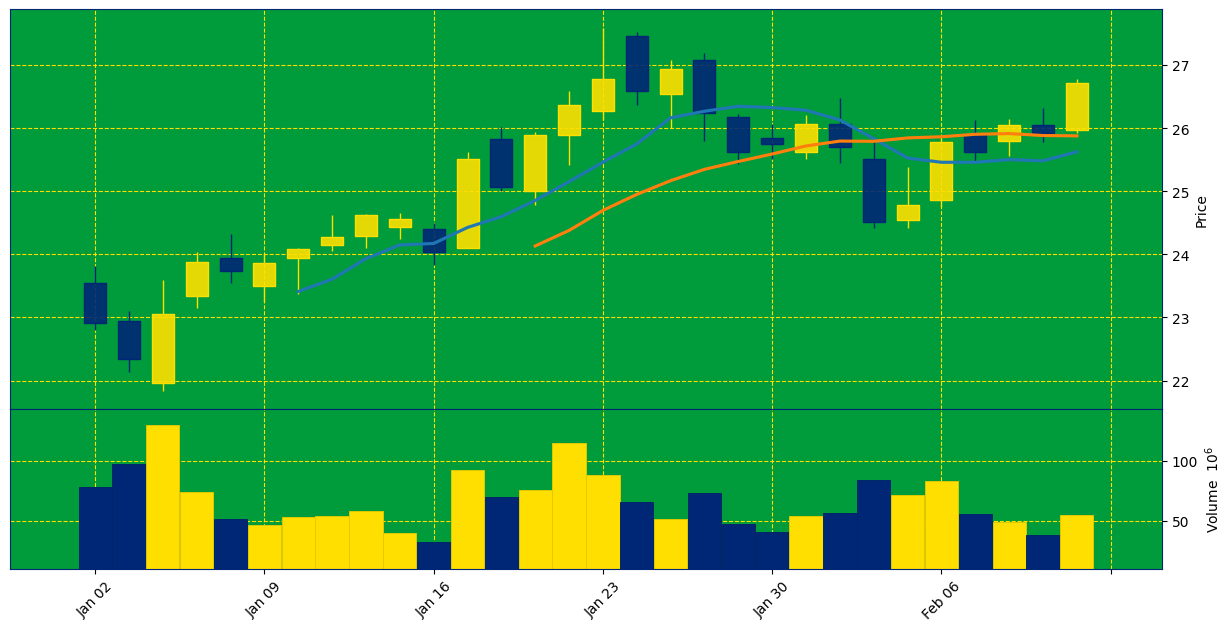

In [33]:
mpf.plot(data.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style="brasil")



<H2> Prevendo o futuro dos dados

In [34]:
dado = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dado = dado.reset_index()

In [35]:
#Definindo os dados que serão treino e os que serão teste
dado_treino = dado[dado['Date'] < '2023-07-31']
dado_teste = dado[dado['Date'] >= '2023-07-31']

In [36]:
# Preparando os dados para o FBProphet
dado_prophet_treino = dado_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [37]:
#Treinando o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name="US")

modelo.fit(dado_prophet_treino)

20:05:51 - cmdstanpy - INFO - Chain [1] start processing
20:05:53 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

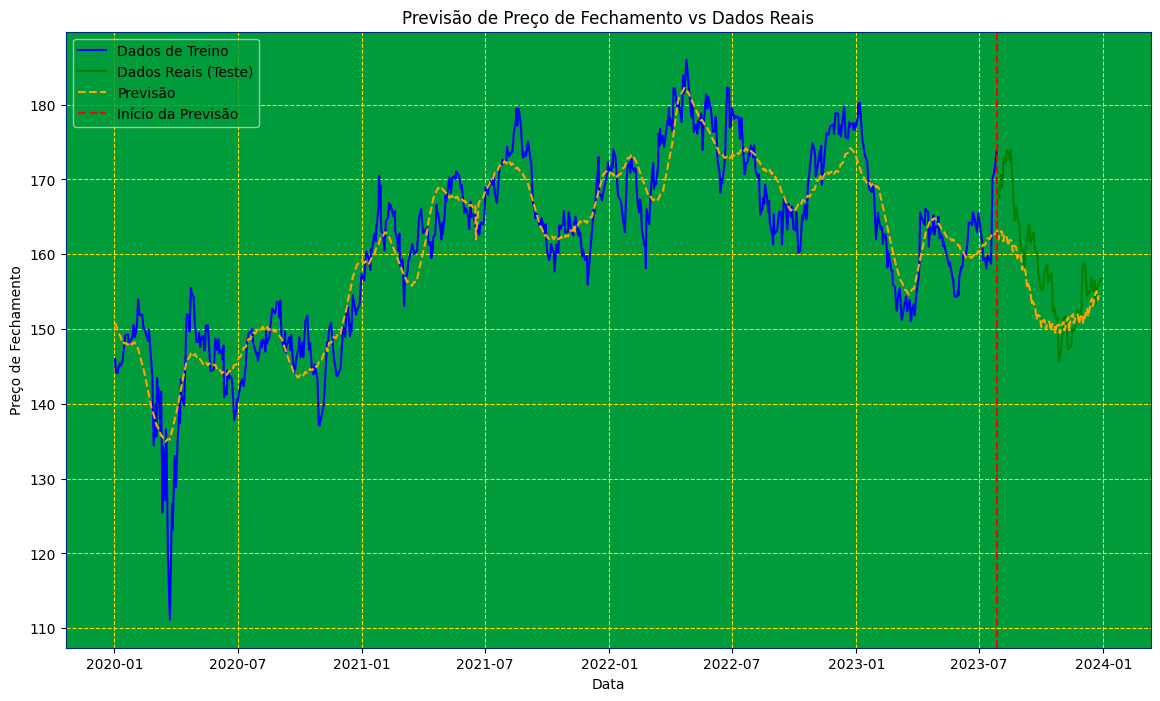

In [39]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dado_treino['Date'], dado_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dado_teste['Date'], dado_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dado_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()